In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('../data/processed/merged_covid_data.csv', index_col=0)
df.head()



,country,date,confirmed,deaths,recovered,new_cases,new_deaths,new_recovered,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,C6M_Stay at home requirements,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Afghanistan,2020-01-22,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


0           0.0
1           0.0
2           0.0
3           0.0
4           4.0
         ...   
1138        0.0
1139        0.0
1140        0.0
1141        0.0
1142    13926.0
Name: new_cases, Length: 1143, dtype: float64


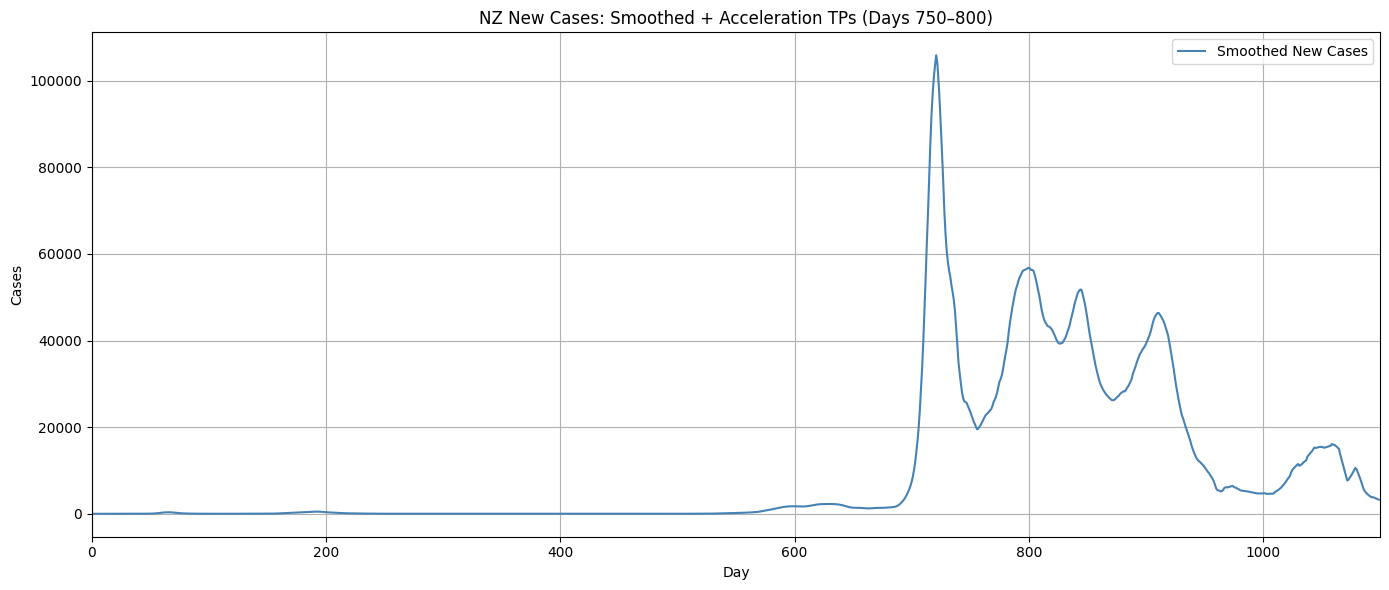

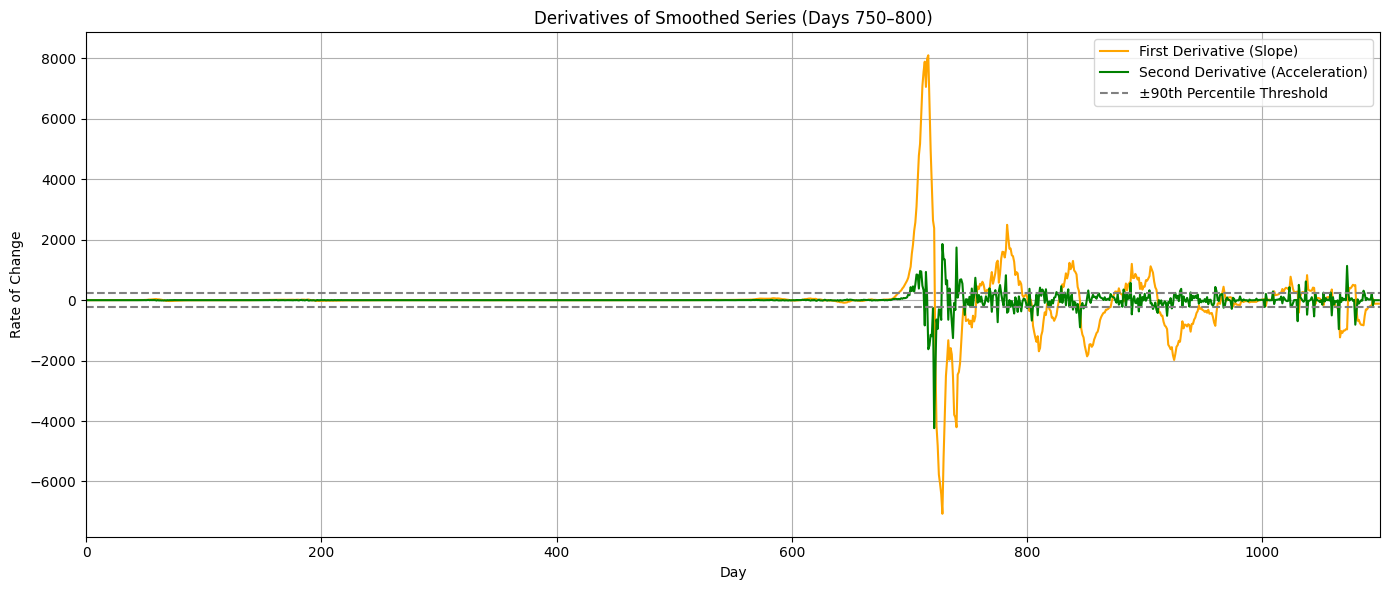

In [25]:
country = "Australia"
df_country = df[df["country"] == country]
series = df_country["new_cases"]
series.index = range(len(series))

print(series)

# Step 1: Smooth the series
smoothed = series.rolling(window=7, center=True, min_periods=1).mean().rolling(window=7, center=True, min_periods=1).mean()

# Step 2: First and second derivative
d1 = smoothed.diff()
d2 = smoothed.shift(-1) - 2 * smoothed + smoothed.shift(1)


# Step 3: Detect sharp changes (|2nd derivative| > 90th percentile)
threshold = np.nanpercentile(np.abs(d2), 90)
spike_indices = np.where(np.abs(d2) > threshold)[0]
spike_dates = smoothed.index[spike_indices]
spike_values = smoothed.iloc[spike_indices]

start, end = 0, 1100
plt.figure(figsize=(14, 6))
plt.plot(smoothed.index[start:end], smoothed.iloc[start:end], label="Smoothed New Cases", color="steelblue")
#plt.scatter(spike_indices, spike_values, color="red", label="Acceleration TPs", zorder=10)
plt.xlim(start, end)
plt.title("NZ New Cases: Smoothed + Acceleration TPs (Days 750–800)")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(d1.index[start:end], d1.iloc[start:end], label="First Derivative (Slope)", color="orange")
plt.plot(d2.index[start:end], d2.iloc[start:end], label="Second Derivative (Acceleration)", color="green")
plt.axhline(threshold, color="gray", linestyle="--", label="±90th Percentile Threshold")
plt.axhline(-threshold, color="gray", linestyle="--")
plt.xlim(start, end)
plt.title("Derivatives of Smoothed Series (Days 750–800)")
plt.xlabel("Day")
plt.ylabel("Rate of Change")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

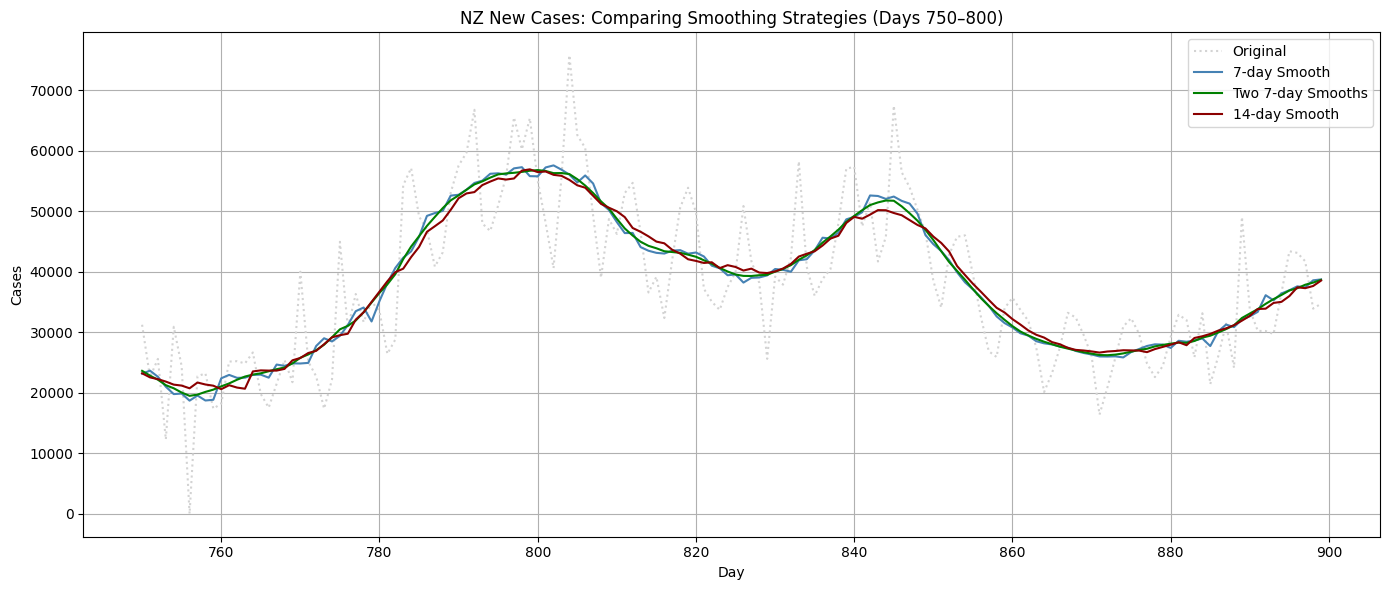

In [26]:
# Apply different smoothing methods
smooth_7 = series.rolling(window=7, center=True, min_periods=1).mean()
smooth_7_twice = smooth_7.rolling(window=7, center=True, min_periods=1).mean()
smooth_14 = series.rolling(window=14, center=True, min_periods=1).mean()

# Plot zoomed section
start, end = 750, 900
plt.figure(figsize=(14, 6))
plt.plot(series[start:end], label="Original", color="lightgray", linestyle="dotted")
plt.plot(smooth_7[start:end], label="7-day Smooth", color="steelblue")
plt.plot(smooth_7_twice[start:end], label="Two 7-day Smooths", color="green")
plt.plot(smooth_14[start:end], label="14-day Smooth", color="darkred")

plt.title("NZ New Cases: Comparing Smoothing Strategies (Days 750–800)")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1138   NaN
1139   NaN
1140   NaN
1141   NaN
1142   NaN
Name: new_cases, Length: 1143, dtype: float64
    index   slope_diff   p_value
0      42    16.966119  0.036244
1      66   -28.186178  0.033167
2      89    15.318577  0.030932
3     154    12.109025  0.007818
4     191   -29.461294  0.006049
5     218    12.269304  0.015095
6     342    -1.343380  0.035870
7     379     0.575796  0.048328
8     386     0.532880  0.048376
9     435     0.706122  0.039781
10    459    -1.318570  0.035036
11    481     0.983660  0.031224
12    510     2.368017  0.049878
13    543     7.902627  0.047187
14    566    41.936501  0.009342
15    591   -39.766872  0.032679
16    629   -75.883544  0.020790
17    664    60.628062  0.043752
18    697  4739.703590  0.028492
19    722 -7534.328910  0.023617
20    746  3474.020185  0.025603
21    797 -2140.730180  0.015241
22    822  1322.863032  0.029508
23    845 -1483.778915  0.036071
24    87

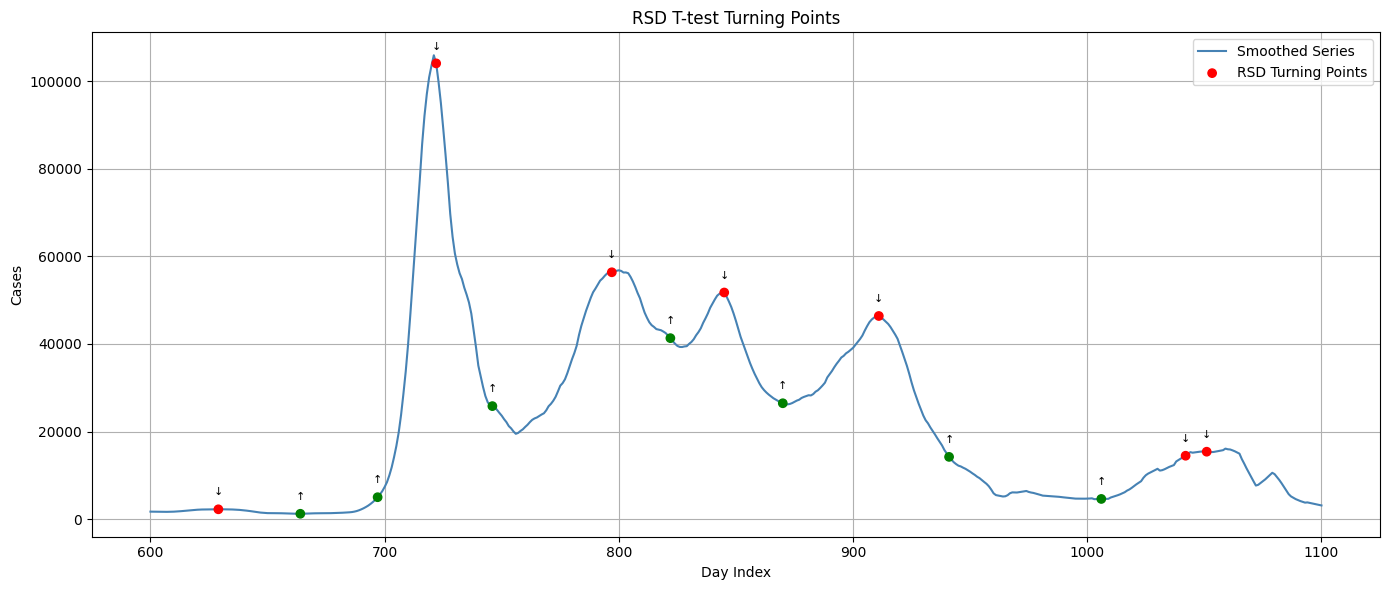

In [ ]:
import pandas as pd
import sys
from pathlib import Path
# Set path to project root (adjust if your notebook is deeper)
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from metrics.find_tp_rsd_ttest import rsd_ttest
import matplotlib.pyplot as plt

def plot_valid_rsd_turning_points(smoothed, rsd_tps, zoom=None, title="RSD T-test Turning Points"):
    """
    Plot smoothed series and mark turning points discovered by RSD t-test.
    
    Parameters:
        smoothed (pd.Series): The smoothed series with possible NaNs
        rsd_tps (pd.DataFrame): DataFrame with 'index', 'slope_diff', 'p_value'
        zoom (tuple): Optional (start_index, end_index) to zoom
    """
    smoothed = smoothed.copy()
    valid_idx = smoothed.dropna().index

    # Filter out TPs that point to NaN in smoothed
    rsd_valid = rsd_tps[rsd_tps["index"].isin(valid_idx)]

    # Optional zoom
    if zoom:
        smoothed = smoothed.loc[zoom[0]:zoom[1]]
        rsd_valid = rsd_valid[(rsd_valid["index"] >= zoom[0]) & (rsd_valid["index"] <= zoom[1])]

    plt.figure(figsize=(14, 6))
    plt.plot(smoothed.index, smoothed.values, label="Smoothed Series", color="steelblue")

    plt.scatter(
        rsd_valid["index"],
        smoothed.loc[rsd_valid["index"]],
        c=["green" if s > 0 else "red" for s in rsd_valid["slope_diff"]],
        label="RSD Turning Points",
        zorder=10
    )

    for _, row in rsd_valid.iterrows():
        plt.annotate("↑" if row["slope_diff"] > 0 else "↓",
                     (row["index"], smoothed.loc[row["index"]]),
                     textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    plt.title(title)
    plt.xlabel("Day Index")
    plt.ylabel("Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Apply double 7-day rolling smoothing as previously chosen
double_smoothed = series.rolling(7, center=True).mean().rolling(7, center=True).mean()
smoothed = series.rolling(7, center=True).mean().rolling(7, center=True).mean()
print(smoothed)


# Run Zuo RSD t-test
rsd_tps = rsd_ttest(smoothed, T=28, alpha=0.05)
print(rsd_tps) 
print(smoothed)


# Plot with zoom (e.g. days 750–800)
plot_valid_rsd_turning_points(double_smoothed, rsd_tps, zoom=(600, 1100))


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
# Set path to project root (adjust if your notebook is deeper)
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.metrics.combined_tp_extraction import extract_combined_turning_points

# Load your dataframe first (assuming 'df' is already defined)
df = pd.read_csv('../data/processed/merged_covid_data.csv', index_col=0)
country = "Australia"
df_country = df[df["country"] == country]
series = df_country["new_cases"]
series.index = range(len(series))



In [24]:
# Detect turning points
combined_tps = extract_combined_turning_points(series, T=28, alpha=0.05, min_separation=7, peak_prominence=50, distance=14,
                                    min_gap_days=14, smooth_window=7, double_smooth=True)

# Smooth the series for plotting
smoothed = series.rolling(7, center=True, min_periods=1).mean().rolling(7, center=True, min_periods=1).mean()




In [25]:
combined_tps

,index,type,source
0,42,up,rsd
1,65,peak,find_peaks
2,89,up,rsd
3,137,trough,find_peaks
4,154,up,rsd
5,192,peak,find_peaks
6,218,up,rsd
7,342,down,rsd
8,379,up,rsd
9,392,trough,find_peaks


In [26]:
import matplotlib.pyplot as plt

def plot_turning_points_with_zoom(smoothed, combined_tps, country="Unknown", zoom=None):
    """
    Plot smoothed series and mark turning points with optional zoom.

    Parameters:
        smoothed (pd.Series): The smoothed time series (with integer index).
        combined_tps (pd.DataFrame): Output from extract_combined_turning_points().
        country (str): Country name for plot title.
        zoom (tuple): (start_index, end_index) to zoom into a time window.
    """
    # Apply zoom if specified
    if zoom:
        start, end = zoom
        smoothed = smoothed.loc[start:end]
        combined_tps = combined_tps[(combined_tps["index"] >= start) & (combined_tps["index"] <= end)]

    plt.figure(figsize=(14, 6))
    plt.plot(smoothed.index, smoothed.values, label="Smoothed Series", color="steelblue")

    for _, row in combined_tps.iterrows():
        if row["index"] in smoothed.index:
            y_val = smoothed.loc[row["index"]]
            color = (
                "green" if row["type"] == "up" else
                "red" if row["type"] == "down" else
                "orange" if row["type"] == "peak" else
                "purple"  # for trough
            )
            plt.scatter(row["index"], y_val, c=color, label=row["type"] + " (" + row["source"] + ")", zorder=10)
            plt.annotate(row["type"], (row["index"], y_val), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    plt.title(f"Turning Points in {country}" + (f" [{zoom[0]}–{zoom[1]}]" if zoom else ""))
    plt.xlabel("Day Index")
    plt.ylabel("New Cases")
    plt.grid(True)
    # plt.legend()  # optional: disable to avoid duplicate labels
    plt.tight_layout()
    plt.show()


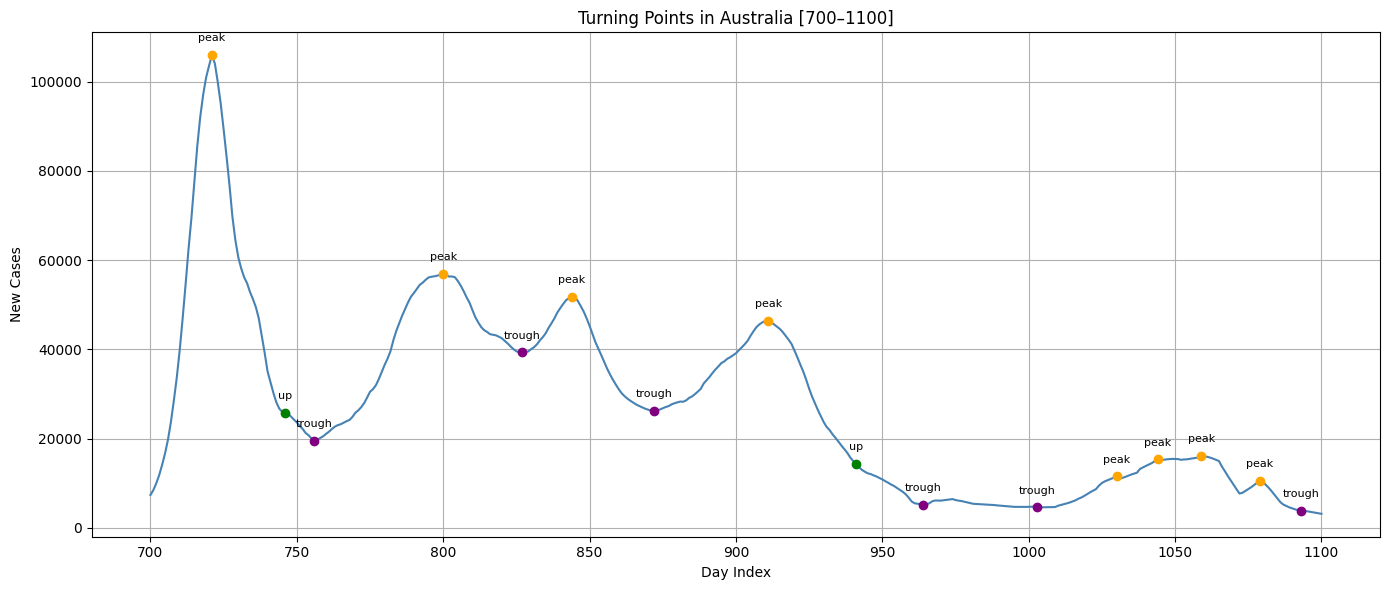

In [28]:
plot_turning_points_with_zoom(smoothed, combined_tps, country="Australia", zoom=(700, 1100))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Set up import path for src
project_root = Path().resolve().parent
sys.path.append(str(project_root))
from src.models.baseline.arima import train_model, predict_model

# --- Load and preprocess data ---
df = pd.read_csv("../data/processed/merged_covid_data.csv")
df["date"] = pd.to_datetime(df["date"])
# --- 70/30 split ---
df = df.sort_values("date")
split_idx = int(len(df) * 0.7)
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

# --- Config ---
config = {
    "countries": ["Australia", "India"],
    "target_var": "new_cases",
    "use_exogenous": True,
    "exogenous_columns": [
        "StringencyIndex_Average",
        "workplaces_percent_change_from_baseline"
    ],
    "scaler": "min_max",
    "min_max_range": (0, 100),
    "exog_scaler": "min_max",
    "seasonal": True,
    "seasonal_period": 7,
    "forecast_steps": 14
}

# --- Train and predict ---
models = train_model(train_df, config)







[Australia] Selected ARIMA order: (2, 1, 3), Seasonal order: (2, 0, 0, 7)
[India] Selected ARIMA order: (2, 1, 2), Seasonal order: (1, 0, 1, 7)


In [3]:
results_df = predict_model(models, test_df, config)

In [4]:
results_df

,country,forecast_origin,true_values,predictions,forecast_dates
0,Australia,2022-03-09,"[36335.0, 31689.0, 35077.0, 33495.0, 26440.0, ...","[36900.7339952951, 35562.72005300668, 30133.63...","[2022-03-09 00:00:00, 2022-03-10 00:00:00, 202..."
1,Australia,2022-03-10,"[31689.0, 35077.0, 33495.0, 26440.0, 28803.0, ...","[35305.43903783835, 29807.055785495064, 34687....","[2022-03-10 00:00:00, 2022-03-11 00:00:00, 202..."
2,Australia,2022-03-11,"[35077.0, 33495.0, 26440.0, 28803.0, 54309.0, ...","[28139.411657393928, 32591.16545844249, 29307....","[2022-03-11 00:00:00, 2022-03-12 00:00:00, 202..."
3,Australia,2022-03-12,"[33495.0, 26440.0, 28803.0, 54309.0, 57148.0, ...","[35906.143273334914, 33362.08644967114, 38367....","[2022-03-12 00:00:00, 2022-03-13 00:00:00, 202..."
4,Australia,2022-03-13,"[26440.0, 28803.0, 54309.0, 57148.0, 49166.0, ...","[32231.60322811896, 36947.091659270794, 36403....","[2022-03-13 00:00:00, 2022-03-14 00:00:00, 202..."
...,...,...,...,...,...
701,India,2023-02-20,"[95.0, 125.0, 193.0, 166.0, 183.0, 218.0, 185....","[23.093593572213383, -3.843719597057641, -39.0...","[2023-02-20 00:00:00, 2023-02-21 00:00:00, 202..."
702,India,2023-02-21,"[125.0, 193.0, 166.0, 183.0, 218.0, 185.0, 169...","[67.93655315560511, 35.19799511205244, -1.8296...","[2023-02-21 00:00:00, 2023-02-22 00:00:00, 202..."
703,India,2023-02-22,"[193.0, 166.0, 183.0, 218.0, 185.0, 169.0, 240...","[92.34210420305433, 57.5037907898534, -22.5268...","[2023-02-22 00:00:00, 2023-02-23 00:00:00, 202..."
704,India,2023-02-23,"[166.0, 183.0, 218.0, 185.0, 169.0, 240.0, 268...","[157.9995171619247, 81.5531205925447, 290.1086...","[2023-02-23 00:00:00, 2023-02-24 00:00:00, 202..."


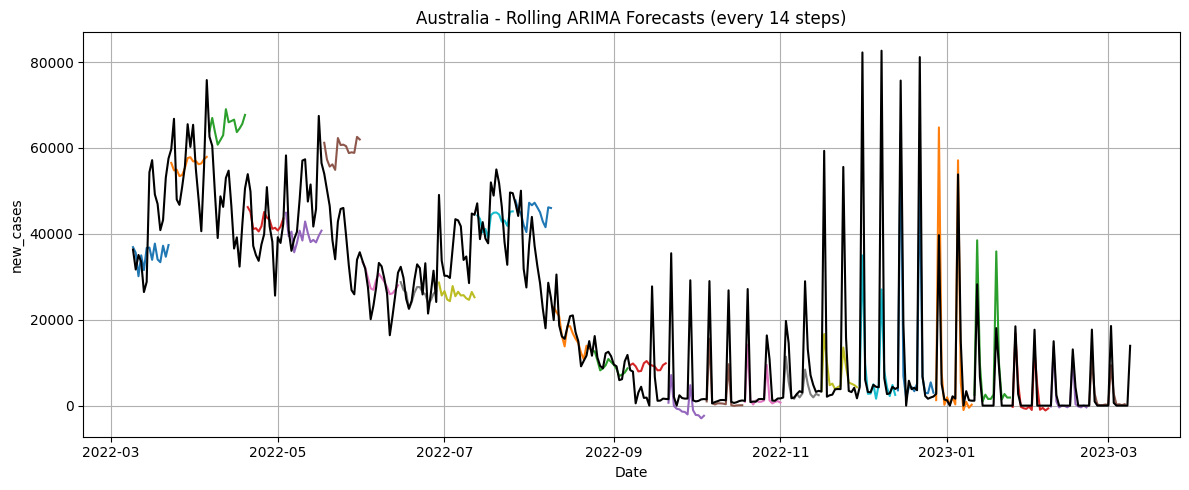

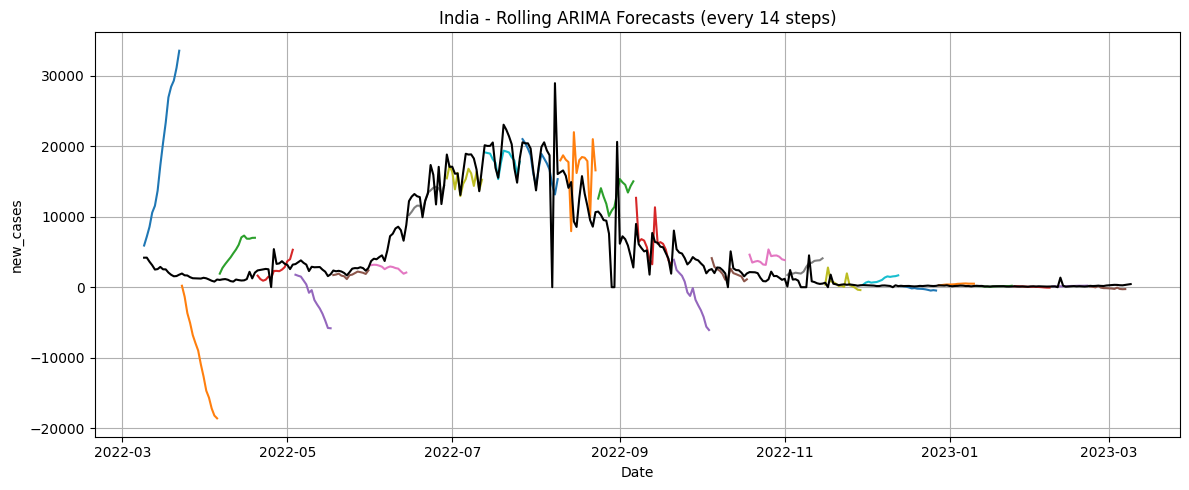

In [5]:
# --- Plotting ---
step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results_df[results_df["country"] == country].reset_index(drop=True)
    sampled = country_df.iloc[::step]

    plt.figure(figsize=(12, 5))

    for _, row in sampled.iterrows():
        dates = pd.to_datetime(row["forecast_dates"])
        preds = row["predictions"]
        plt.plot(dates, preds, label=f"Forecast from {row['forecast_origin'].date()}")

    true_series = test_df[test_df["country"] == country].copy()
    plt.plot(true_series["date"], true_series[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} - Rolling ARIMA Forecasts (every {step} steps)")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    # plt.legend()  # Optional
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Importing plotly failed. Interactive plots will not work.
17:37:45 - cmdstanpy - INFO - Chain [1] start processing
17:37:45 - cmdstanpy - INFO - Chain [1] done processing
17:37:46 - cmdstanpy - INFO - Chain [1] start processing
17:37:46 - cmdstanpy - INFO - Chain [1] done processing
17:37:46 - cmdstanpy - INFO - Chain [1] start processing
17:37:46 - cmdstanpy - INFO - Chain [1] done processing
17:37:46 - cmdstanpy - INFO - Chain [1] start processing
17:37:46 - cmdstanpy - INFO - Chain [1] done processing
17:37:46 - cmdstanpy - INFO - Chain [1] start processing
17:37:47 - cmdstanpy - INFO - Chain [1] done processing
17:37:47 - cmdstanpy - INFO - Chain [1] start processing
17:37:47 - cmdstanpy - INFO - Chain [1] done processing
17:37:47 - cmdstanpy - INFO - Chain [1] start processing
17:37:47 - cmdstanpy - INFO - Chain [1] done processing
17:37:47 - cmdstanpy - INFO - Chain [1] start processing
17:37:47 - cmdstanpy - INFO - Chain [1] done processing
17:37:48 - cmdstanpy - INFO - Chain [1

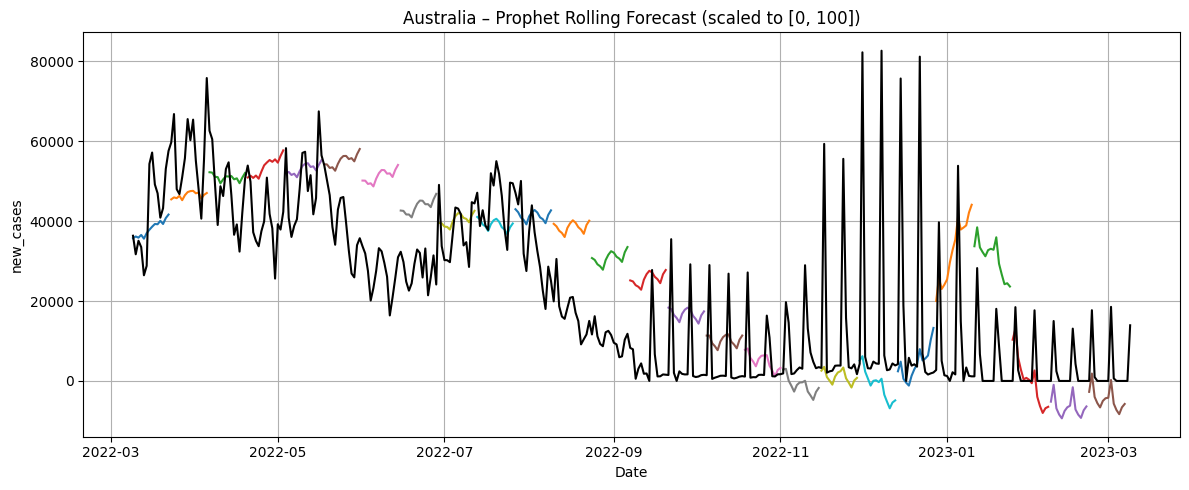

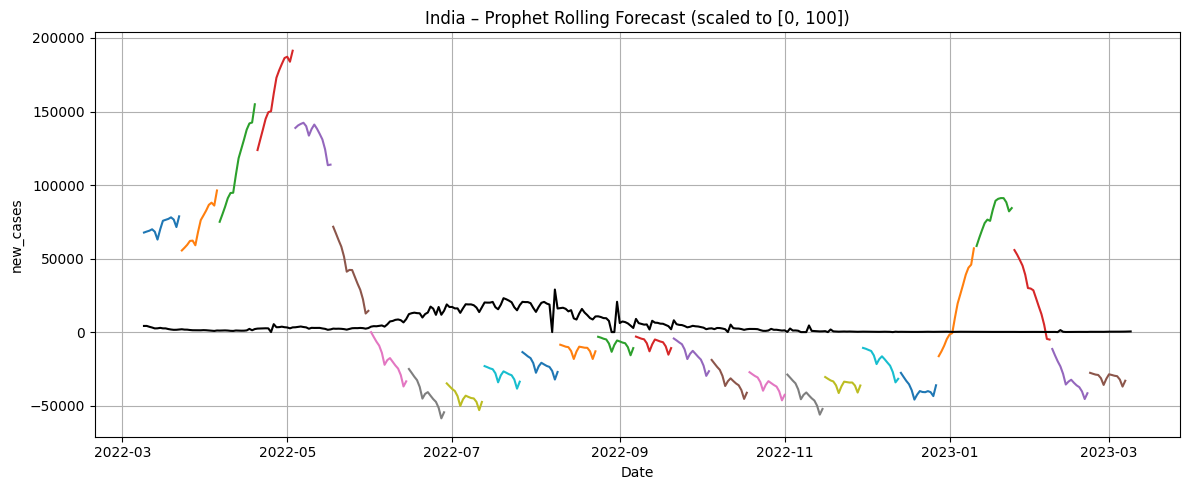

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.models.baseline.prophet import predict_model

# --- Load data ---
df = pd.read_csv("../data/processed/merged_covid_data.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
#df = df[df["date"] >= "2021-01-01"]  # optional filtering

# --- Train/test split ---
split_index = int(len(df) * 0.7)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# --- Prophet config ---
config = {
    "countries": ["Australia", "India"],
    "target_var": "new_cases",
    "forecast_steps": 14,
    "scaler": "min_max",
    "min_max_range": (0, 100),
    "seasonalities": [
        {"name": "weekly", "period": 7, "fourier_order": 3},
        {"name": "yearly", "period": 365.25, "fourier_order": 10}
    ]
}

# --- Run prediction ---
results_df = predict_model(train_df, test_df, config)

# --- Plot rolling forecasts ---
step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results_df[results_df["country"] == country].reset_index(drop=True)
    sampled = country_df.iloc[::step]

    plt.figure(figsize=(12, 5))
    for _, row in sampled.iterrows():
        dates = pd.to_datetime(row["forecast_dates"])
        preds = row["predictions"]
        plt.plot(dates, preds, label=f"Forecast from {row['forecast_origin'].date()}")

    actual_series = test_df[test_df["country"] == country]
    plt.plot(actual_series["date"], actual_series[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} – Prophet Rolling Forecast (scaled to [0, 100])")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:01 - cmdstanpy - INFO - Chain [1] done processing
17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:02 - cmdstanpy - INFO - Chain [1] done processing
17:51:02 - cmdstanpy - INFO - Chain [1] start processing
17:51:02 - cmdstanpy - INFO - Chain [1] done processing
17:51:02 - cmdstanpy - INFO - Chain [1] start processing
17:51:02 - cmdstanpy - INFO - Chain [1] done processing
17:51:02 - cmdstanpy - INFO - Chain [1] start processing
17:51:02 - cmdstanpy - INFO - Chain [1] done processing
17:51:03 - cmdstanpy - INFO - Chain [1] start processing
17:51:03 - cmdstanpy - INFO - Chain [1] done processing
17:51:03 - cmdstanpy - INFO - Chain [1] start processing
17:51:03 - cmdstanpy - INFO - Chain [1] done processing
17:51:03 - cmdstanpy - INFO - Chain [1] start processing
17:51:03 - cmdstanpy - INFO - Chain [1] done processing
17:51:03 - cmdstanpy - INFO - Chain [1] start processing
17:51:03 - cmdstanpy - INFO - Chain [1]

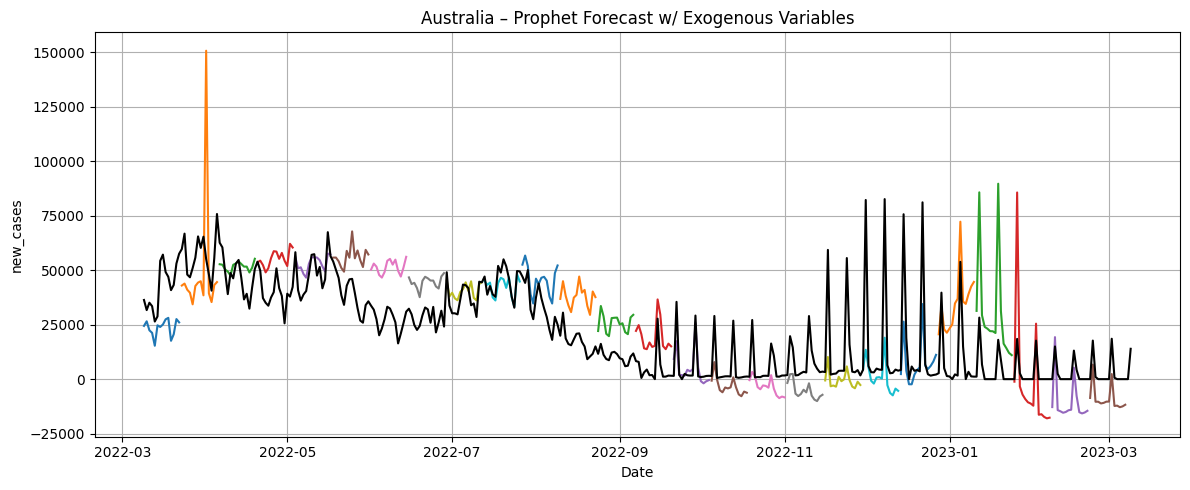

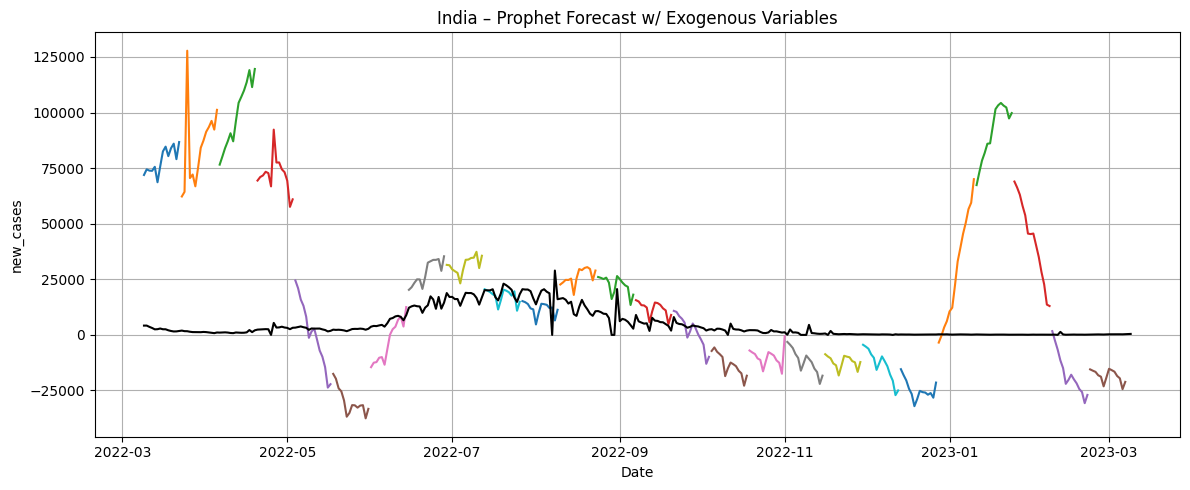

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.models.baseline.prophet import predict_model

# --- Load data ---
df = pd.read_csv("../data/processed/merged_covid_data.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
#df = df[df["date"] >= "2021-01-01"]  # optional filtering

# --- Train/test split ---
split_index = int(len(df) * 0.7)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# --- Config with exogenous vars ---
config = {
    "countries": ["Australia", "India"],
    "target_var": "new_cases",
    "forecast_steps": 14,
    "scaler": "min_max",
    "min_max_range": (0, 100),
    "exogenous_vars": [
        "new_deaths",
        "new_recovered",
        "confirmed",
        "retail_and_recreation_percent_change_from_baseline"
    ],
    "seasonalities": [
        {"name": "weekly", "period": 7, "fourier_order": 3},
        {"name": "yearly", "period": 365.25, "fourier_order": 10}
    ]
}

# --- Run forecasting ---
results_df = predict_model(train_df, test_df, config)

# --- Plot rolling forecasts ---
step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results_df[results_df["country"] == country].reset_index(drop=True)
    sampled = country_df.iloc[::step]

    plt.figure(figsize=(12, 5))
    for _, row in sampled.iterrows():
        dates = pd.to_datetime(row["forecast_dates"])
        preds = row["predictions"]
        plt.plot(dates, preds, label=f"Forecast from {row['forecast_origin'].date()}")

    actual_series = test_df[test_df["country"] == country]
    plt.plot(actual_series["date"], actual_series[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} – Prophet Forecast w/ Exogenous Variables")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

c:\Users\guoya\miniconda3\envs\covidmodels\lib\site-packages\prophet\forecaster.py:243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  name in self.holidays['holiday'].unique()):
19:50:55 - cmdstanpy - INFO - Chain [1] start processing
19:50:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\guoya\miniconda3\envs\covidmodels\lib\site-packages\prophet\forecaster.py:243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  name in self.holidays['holiday'].unique()):
19:50:56 - cmdstanpy - INFO - Chain [1] start processing
19:50:56 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\guoya\miniconda3\envs\covidmodels\lib\site-packages\prophet\forecaster.py:243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  name in self.holidays['holiday'].uniqu

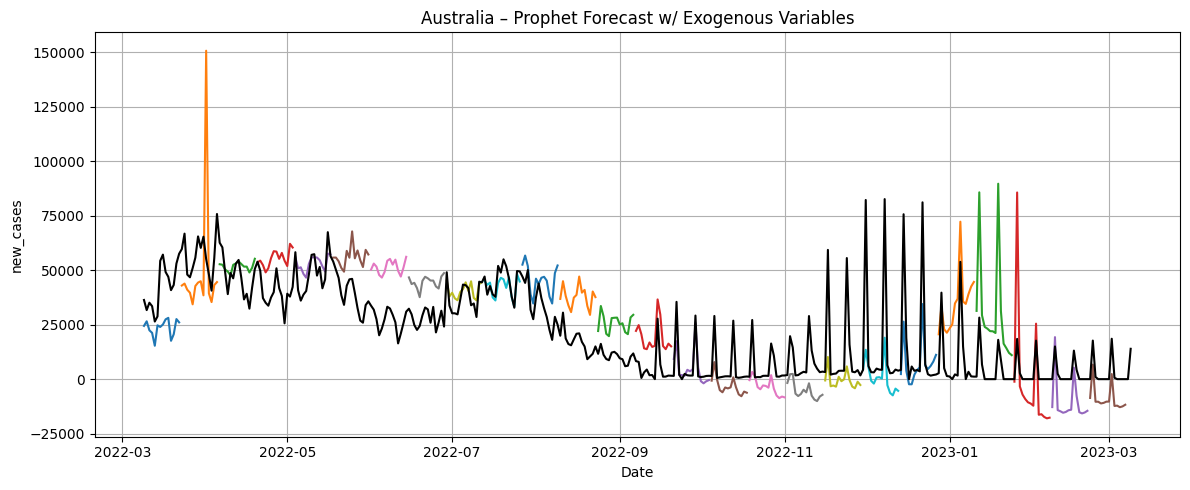

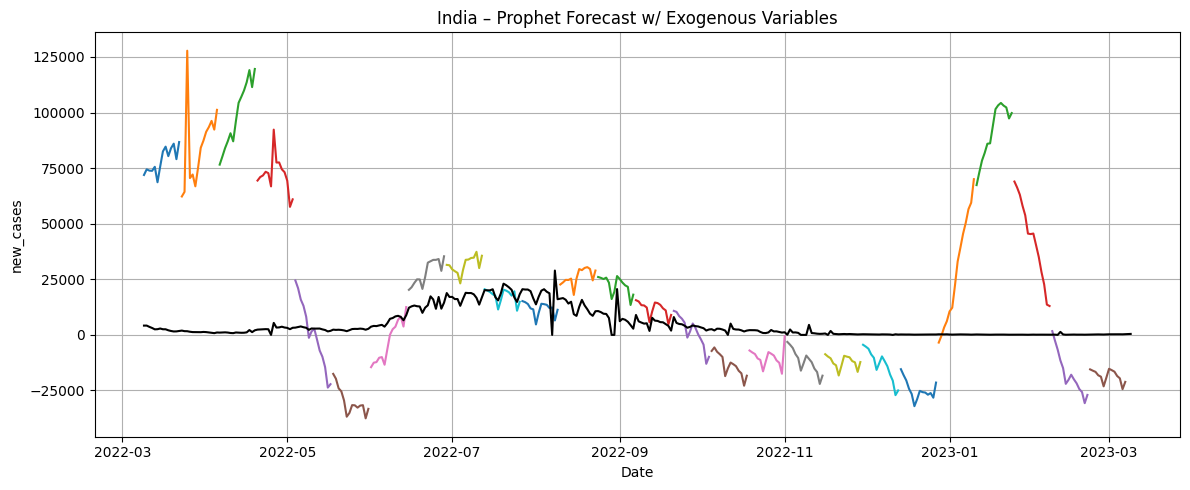

In [4]:
from src.models.baseline.prophet import predict_model, generate_fixed_holidays

# --- Prepare fixed holiday DataFrames ---
calendar_holidays = {
    "Australia": generate_fixed_holidays("AU"),
    "India": generate_fixed_holidays("IN")
}

# --- Update config with holidays ---
config = {
    "countries": ["Australia", "India"],
    "target_var": "new_cases",
    "forecast_steps": 14,
    "scaler": "min_max",
    "min_max_range": (0, 100),
    "exogenous_vars": [
        "new_deaths",
        "new_recovered",
        "confirmed",
        "retail_and_recreation_percent_change_from_baseline"
    ],
    "seasonalities": [
        {"name": "weekly", "period": 7, "fourier_order": 3},
        {"name": "yearly", "period": 365.25, "fourier_order": 10}
    ],
    "holidays": calendar_holidays
}

# --- Run forecasting ---
results_df = predict_model(train_df, test_df, config)

# --- Plot rolling forecasts ---
step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results_df[results_df["country"] == country].reset_index(drop=True)
    sampled = country_df.iloc[::step]

    plt.figure(figsize=(12, 5))
    for _, row in sampled.iterrows():
        dates = pd.to_datetime(row["forecast_dates"])
        preds = row["predictions"]
        plt.plot(dates, preds, label=f"Forecast from {row['forecast_origin'].date()}")

    actual_series = test_df[test_df["country"] == country]
    plt.plot(actual_series["date"], actual_series[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} – Prophet Forecast w/ Exogenous Variables")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

20:41:54 - cmdstanpy - INFO - Chain [1] start processing
20:41:54 - cmdstanpy - INFO - Chain [1] done processing
20:41:54 - cmdstanpy - INFO - Chain [1] start processing
20:41:54 - cmdstanpy - INFO - Chain [1] done processing
20:41:55 - cmdstanpy - INFO - Chain [1] start processing
20:41:55 - cmdstanpy - INFO - Chain [1] done processing
20:41:55 - cmdstanpy - INFO - Chain [1] start processing
20:41:55 - cmdstanpy - INFO - Chain [1] done processing
20:41:55 - cmdstanpy - INFO - Chain [1] start processing
20:41:55 - cmdstanpy - INFO - Chain [1] done processing
20:41:56 - cmdstanpy - INFO - Chain [1] start processing
20:41:56 - cmdstanpy - INFO - Chain [1] done processing
20:41:56 - cmdstanpy - INFO - Chain [1] start processing
20:41:56 - cmdstanpy - INFO - Chain [1] done processing
20:41:56 - cmdstanpy - INFO - Chain [1] start processing
20:41:56 - cmdstanpy - INFO - Chain [1] done processing
20:41:57 - cmdstanpy - INFO - Chain [1] start processing
20:41:57 - cmdstanpy - INFO - Chain [1]

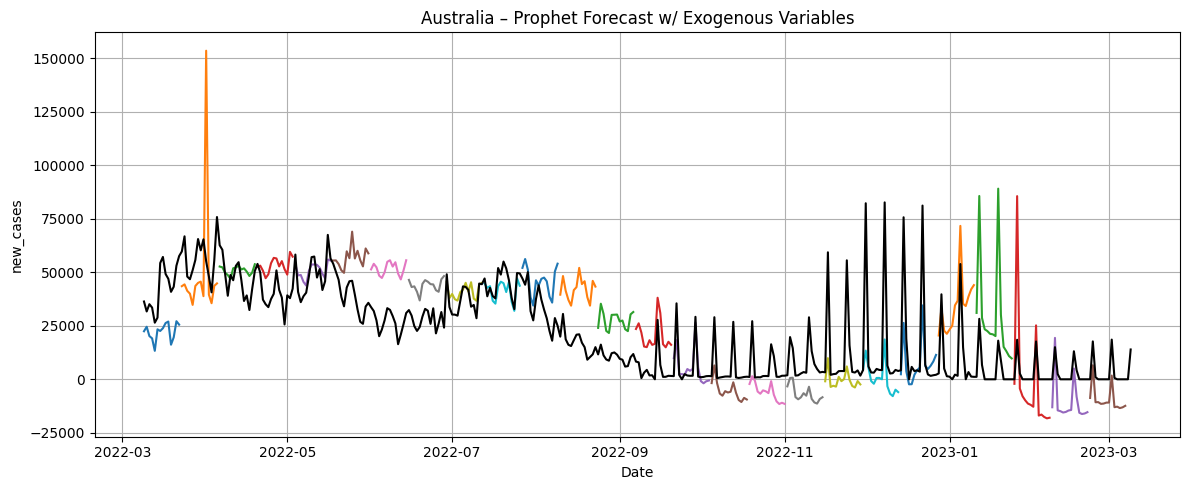

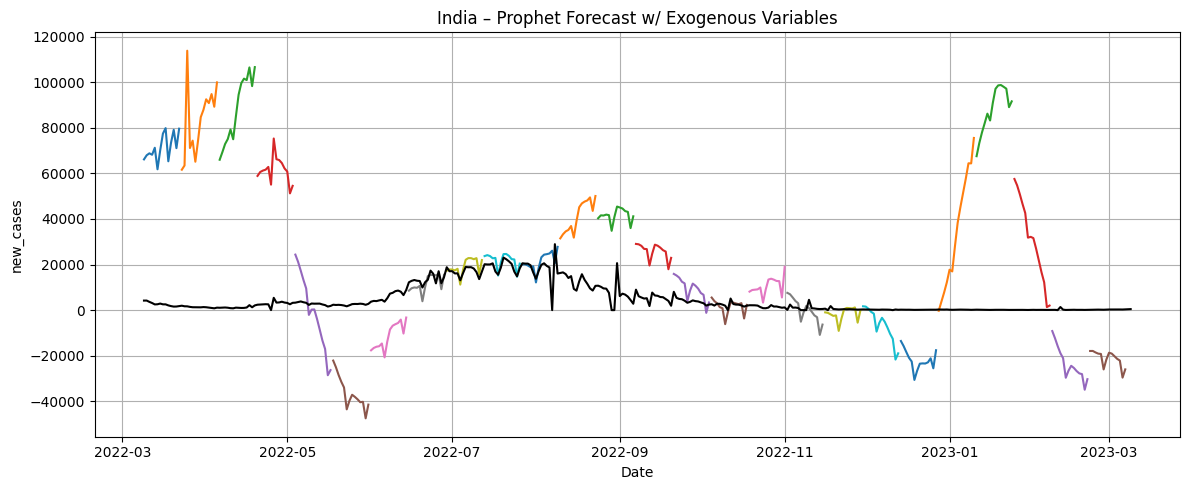

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Setup path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

from src.models.baseline.prophet import (
    predict_model,
    generate_fixed_holidays,
    generate_oxcgrt_holidays
)

# --- Load data ---
df = pd.read_csv("../data/processed/merged_covid_data.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
#df = df[df["date"] >= "2021-01-01"]  # optional filtering

calendar_holidays = {
    "Australia": generate_fixed_holidays("AU"),
    "India": generate_fixed_holidays("IN")
}

oxcgrt_holidays = generate_oxcgrt_holidays(df, policy_column="StringencyIndex_Average", threshold=70)

# --- Combine the two ---
combined_holidays = {}
for country in ["Australia", "India"]:
    cal_df = calendar_holidays.get(country, pd.DataFrame())
    ox_df = oxcgrt_holidays.get(country, pd.DataFrame())
    combined = pd.concat([cal_df, ox_df], ignore_index=True)
    combined_holidays[country] = combined

# --- Train/test split ---
split_index = int(len(df) * 0.7)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# --- Config with exogenous vars ---
config = {
    "countries": ["Australia", "India"],
    "target_var": "new_cases",
    "forecast_steps": 14,
    "scaler": "min_max",
    "min_max_range": (0, 100),
    "exogenous_vars": [
        "new_deaths",
        "new_recovered",
        "confirmed",
        "retail_and_recreation_percent_change_from_baseline"
    ],
    "seasonalities": [
        {"name": "weekly", "period": 7, "fourier_order": 3},
        {"name": "yearly", "period": 365.25, "fourier_order": 10}
    ],
    "holidays": combined_holidays
}


# --- Run forecasting ---
results_df = predict_model(train_df, test_df, config)

# --- Plot rolling forecasts ---
step = config["forecast_steps"]

for country in config["countries"]:
    country_df = results_df[results_df["country"] == country].reset_index(drop=True)
    sampled = country_df.iloc[::step]

    plt.figure(figsize=(12, 5))
    for _, row in sampled.iterrows():
        dates = pd.to_datetime(row["forecast_dates"])
        preds = row["predictions"]
        plt.plot(dates, preds, label=f"Forecast from {row['forecast_origin'].date()}")

    actual_series = test_df[test_df["country"] == country]
    plt.plot(actual_series["date"], actual_series[config["target_var"]],
             label="True Values", color="black", linewidth=1.5)

    plt.title(f"{country} – Prophet Forecast w/ Exogenous Variables")
    plt.xlabel("Date")
    plt.ylabel(config["target_var"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()